<a href="https://colab.research.google.com/github/zaidalyafeai/Coronavirus/blob/master/Coronavirus_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Website

In [0]:
!wget https://www.worldometers.info/coronavirus/

--2020-04-10 13:26:16--  https://www.worldometers.info/coronavirus/
Resolving www.worldometers.info (www.worldometers.info)... 104.26.4.2, 104.26.5.2, 2606:4700:20::681a:402, ...
Connecting to www.worldometers.info (www.worldometers.info)|104.26.4.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [   <=>              ]   1.01M  1.73MB/s    in 0.6s    

2020-04-10 13:26:18 (1.73 MB/s) - ‘index.html’ saved [1057370]



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Preprocess

In [0]:
# process page
html = open('index.html')
soup = BeautifulSoup(html.read())
table = soup.find("table", attrs={"id":"main_table_countries_today"})

# The first tr contains the field names.
headings = [th.get_text() for th in table.find("thead").find_all("th")]
rows = [th for th in table.find("tbody").find_all("tr", attrs={"style":""})]

data = []
for row in rows[1:]:
  data.append([th.get_text() for th in row.find_all("td")])

df = pd.DataFrame(data, columns=headings)

# some preprocessing 
df = df.rename(columns=lambda x: x.replace('\n','').replace(',',''))
df.drop(['NewCases', 'NewDeaths'], inplace=True, axis = 1)
column_names = list(df.columns)

# remove spaces then cast to float 
df = df[column_names].replace(',', '', regex=True)
df = df[column_names].replace(' ', '', regex=True)
df = df[column_names].replace('', np.nan, regex=True)
column_names.remove('CountryOther')
column_names.remove('Continent')
df[column_names] = df[column_names].astype('float')

In [0]:
df.head()

,CountryOther,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
0,USA,468895.0,16697.0,25928.0,426270.0,10011.0,1417.0,50.0,2376977.0,7181.0,NorthAmerica
1,Spain,157022.0,15843.0,55668.0,85511.0,7371.0,3358.0,339.0,355000.0,7593.0,Europe
2,Italy,143626.0,18279.0,28470.0,96877.0,3605.0,2375.0,302.0,853369.0,14114.0,Europe
3,Germany,118235.0,2607.0,52407.0,63221.0,4895.0,1411.0,31.0,1317887.0,15730.0,Europe
4,France,117749.0,12210.0,23206.0,82333.0,7066.0,1804.0,187.0,333807.0,5114.0,Europe


## Percentage of Cases to Testing 

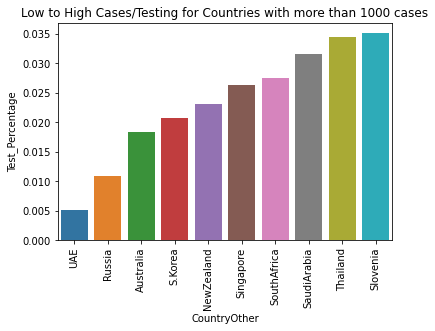

In [0]:
df["Test_Percentage"] = df["TotalCases"]/df["TotalTests"]
nlargest = df[df['TotalCases'] > 1000].nsmallest(10, "Test_Percentage")
g = sns.barplot(x ="CountryOther", y = "Test_Percentage", data = nlargest)
plt.title("Low to High Cases/Testing for Countries with more than 1000 cases")
t = plt.xticks(rotation=90)

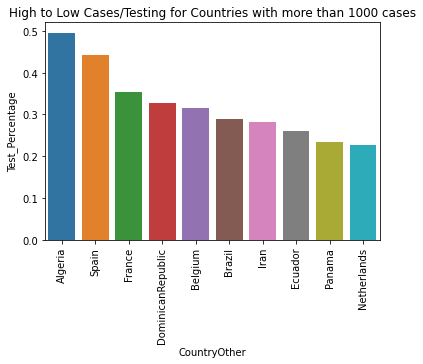

In [0]:
df["Test_Percentage"] = df["TotalCases"]/df["TotalTests"]
nlargest = df[df['TotalCases'] > 1000].nlargest(10, "Test_Percentage")
g = sns.barplot(x ="CountryOther", y = "Test_Percentage", data = nlargest)
plt.title("High to Low Cases/Testing for Countries with more than 1000 cases")
t = plt.xticks(rotation=90)

## Percentage of Recoveries to Cases 

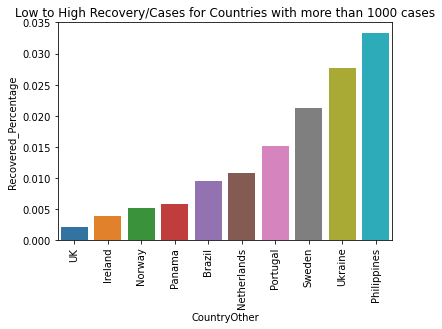

In [0]:
df["Recovered_Percentage"] = df["TotalRecovered"]/df["TotalCases"]
nlargest = df[df['TotalCases'] > 1000].nsmallest(10, "Recovered_Percentage")
g = sns.barplot(x ="CountryOther", y = "Recovered_Percentage", data = nlargest)
plt.title("Low to High Recovery/Cases for Countries with more than 1000 cases")
t = plt.xticks(rotation=90)

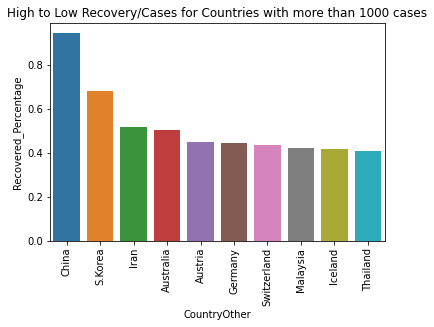

In [0]:
df["Recovered_Percentage"] = df["TotalRecovered"]/df["TotalCases"]
nlargest = df[df['TotalCases'] > 1000].nlargest(10, "Recovered_Percentage")
g = sns.barplot(x ="CountryOther", y = "Recovered_Percentage", data = nlargest)
plt.title("High to Low Recovery/Cases for Countries with more than 1000 cases")
t = plt.xticks(rotation=90)